In [ ]:
pip install webdriver_manager

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
%%shell
# Ubuntu no longer distributes chromium-browser outside of snap
#
# Proposed solution: https://askubuntu.com/questions/1204571/how-to-install-chromium-without-snap

# Add debian buster
cat > /etc/apt/sources.list.d/debian.list <<'EOF'
deb [arch=amd64 signed-by=/usr/share/keyrings/debian-buster.gpg] http://deb.debian.org/debian buster main
deb [arch=amd64 signed-by=/usr/share/keyrings/debian-buster-updates.gpg] http://deb.debian.org/debian buster-updates main
deb [arch=amd64 signed-by=/usr/share/keyrings/debian-security-buster.gpg] http://deb.debian.org/debian-security buster/updates main
EOF

# Add keys
apt-key adv --keyserver keyserver.ubuntu.com --recv-keys DCC9EFBF77E11517
apt-key adv --keyserver keyserver.ubuntu.com --recv-keys 648ACFD622F3D138
apt-key adv --keyserver keyserver.ubuntu.com --recv-keys 112695A0E562B32A

apt-key export 77E11517 | gpg --dearmour -o /usr/share/keyrings/debian-buster.gpg
apt-key export 22F3D138 | gpg --dearmour -o /usr/share/keyrings/debian-buster-updates.gpg
apt-key export E562B32A | gpg --dearmour -o /usr/share/keyrings/debian-security-buster.gpg

# Prefer debian repo for chromium* packages only
# Note the double-blank lines between entries
cat > /etc/apt/preferences.d/chromium.pref << 'EOF'
Package: *
Pin: release a=eoan
Pin-Priority: 500


Package: *
Pin: origin "deb.debian.org"
Pin-Priority: 300


Package: chromium*
Pin: origin "deb.debian.org"
Pin-Priority: 700
EOF

# Install chromium and chromium-driver
apt-get update
apt-get install chromium chromium-driver

# Install selenium
pip install selenium

Executing: /tmp/apt-key-gpghome.MsBicH7Jqg/gpg.1.sh --keyserver keyserver.ubuntu.com --recv-keys DCC9EFBF77E11517
gpg: key DCC9EFBF77E11517: public key "Debian Stable Release Key (10/buster) <debian-release@lists.debian.org>" imported
gpg: Total number processed: 1
gpg:               imported: 1
Executing: /tmp/apt-key-gpghome.FlgZVv6I1Y/gpg.1.sh --keyserver keyserver.ubuntu.com --recv-keys 648ACFD622F3D138
gpg: key DC30D7C23CBBABEE: public key "Debian Archive Automatic Signing Key (10/buster) <ftpmaster@debian.org>" imported
gpg: Total number processed: 1
gpg:               imported: 1
Executing: /tmp/apt-key-gpghome.Brz5RgDMmT/gpg.1.sh --keyserver keyserver.ubuntu.com --recv-keys 112695A0E562B32A
gpg: key 4DFAB270CAA96DFA: public key "Debian Security Archive Automatic Signing Key (10/buster) <ftpmaster@debian.org>" imported
gpg: Total number processed: 1
gpg:               imported: 1
Get:1 http://deb.debian.org/debian buster InRelease [122 kB]
Get:2 http://deb.debian.org/debian bust

In [ ]:
from selenium import webdriver
import pandas as pd
import time
from webdriver_manager.chrome import ChromeDriver
from pathlib import Path

In [ ]:
def web_driver():
    options = webdriver.ChromeOptions()
    options.add_argument("--verbose")
    options.add_argument('--no-sandbox')
    options.add_argument('--headless')
    options.add_argument('--disable-gpu')
    options.add_argument("--window-size=1920, 1200")
    options.add_argument('--disable-dev-shm-usage')
    driver = webdriver.Chrome(options=options)
    return driver

In [ ]:
from selenium.webdriver.common.by import By
driver = web_driver()
driver.get("https://en.wikipedia.org/wiki/List_of_Game_of_Thrones_characters")

In [ ]:
cast_table = driver.find_elements(By.CLASS_NAME, 'wikitable')
tr_elements_main = cast_table[0].find_elements(By.TAG_NAME, 'tr')

dict_character=[]

for tr in tr_elements_main:
    # Find all <td> elements within the current <tr>
    td_elements = tr.find_elements(By.TAG_NAME, 'td')
    if len(td_elements)>=2:
      row = {"Actor" : td_elements[0].text,
            "Character" : td_elements[1].text,
            "Main/Recurring" : "Main"
            }
      dict_character.append(row)

tr_elements_recurring  = cast_table[1].find_elements(By.TAG_NAME, 'tr')
for tr in tr_elements_recurring:
    # Find all <td> elements within the current <tr>
    td_elements = tr.find_elements(By.TAG_NAME, 'td')
    if len(td_elements)>=2:
      row = {"Actor" : td_elements[0].text,
            "Character" : td_elements[1].text,
            "Main/Recurring" : "Recurring"
            }
      dict_character.append(row)

In [ ]:
df = pd.DataFrame(dict_character)
print(df)

                     Actor           Character Main/Recurring
0                Sean Bean  Eddard "Ned" Stark           Main
1                Mark Addy    Robert Baratheon           Main
2    Nikolaj Coster-Waldau     Jaime Lannister           Main
3         Michelle Fairley       Catelyn Stark           Main
4              Lena Headey    Cersei Lannister           Main
..                     ...                 ...            ...
157         James Faulkner       Randyll Tarly      Recurring
158             Tom Hopper        Dickon Tarly      Recurring
159         Brendan Cowell              Harrag      Recurring
160        Vladimir Furdik          Night King      Recurring
161        Megan Parkinson       Alys Karstark      Recurring

[162 rows x 3 columns]


In [ ]:
import numpy as np
import spacy
from spacy import displacy
import networkx as nx

import matplotlib.pyplot as plt

In [ ]:
!python3 -m spacy download en_core_web_sm

2023-06-07 15:43:09.062467: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 51.6 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')


In [ ]:
# Load spacy English languague model
NER = spacy.load("en_core_web_sm")

In [ ]:
def ner(file_name):
    nlp = spacy.load("en_core_web_sm")
    book_doc = nlp(file_name)
    return book_doc

def get_ne_list_per_sentence(spacy_doc):

    sent_entity_df = []

    # Loop through sentences, store named entity list for each sentence
    for sent in spacy_doc.sents:
        entity_list = [ent.text for ent in sent.ents]
        sent_entity_df.append({"sentence": sent, "entities": entity_list})

    sent_entity_df = pd.DataFrame(sent_entity_df)

    return sent_entity_df

def create_relationships(df, window_size):

    relationships = []

    for i in range(df.index[-1]):
        end_i = min(i + window_size, df.index[-1])
        char_list = sum((df.loc[i: end_i].character_entities), [])

        # Remove duplicated characters that are next to each other
        char_unique = [char_list[i] for i in range(len(char_list))
                       if (i==0) or char_list[i] != char_list[i-1]]

        if len(char_unique) > 1:
            for idx, a in enumerate(char_unique[:-1]):
                b = char_unique[idx + 1]
                relationships.append({"source": a, "target": b})

    relationship_df = pd.DataFrame(relationships)
    # Sort the cases with a->b and b->a
    relationship_df = pd.DataFrame(np.sort(relationship_df.values, axis = 1),
                                   columns = relationship_df.columns)
    relationship_df["value"] = 1
    relationship_df = relationship_df.groupby(["source","target"],
                                              sort=False,
                                              as_index=False).sum()

    return relationship_df

def filter_entity(ent_list, character_df):
    return [ent for ent in ent_list
            if ent in list(character_df.Character)
            or ent in list(character_df.First_Name)]

In [ ]:
character_df = pd.read_csv("Files/GOT_Characters.csv",index_col=0)
import re

def extract_name(row):
    character = row['Character']
    match = re.search(r'"([^"]+)"', character)
    if match:
        return match.group(1)
    else:
        if character.split()[0] in ["Maester","Septa"]:
          return character.split()[1]
        elif character == "The High Sparrow":
          return character
        elif character.split()[0] in ["Grand"]:
          return character.split()[2]
        else:
          return character.split()[0]

# Definir o sobrenome da primeira pessoa na coluna 'Primeiro Nome'
character_df['First_Name'] = character_df.apply(extract_name, axis=1)
character_df['Character'] = character_df['Character'].str.replace(r'"([^"]+)"', '',regex=True).str.strip()
character_df['Character'] = character_df['Character'].str.replace(r'\s+', ' ', regex=True)

##Load the books



In [ ]:
directory = Path('/content/Files/BOOKS')

file_paths = sorted(directory.glob('*.txt'))


In [ ]:
# Define the chunk size
all_books = [b for b in file_paths]
all_books.sort(key=lambda x: x.name)
print(all_books[0].name)

1 - A Game of Thrones.txt


In [ ]:
books_graph=[]
PATH = Path("Files/Extracted Data")

for book in all_books:
  with open(book, "r") as file:
    content = file.read()
  if len(content)>1000000:
    chunk_max = 1000000
    chunks = [content[i:i + chunk_max] for i in range(0, len(content), chunk_max)]
    big_book_df = pd.DataFrame()
    for chunk in chunks:
      book_text = ner(chunk)
      sent_entity_df = get_ne_list_per_sentence(book_text)
      big_book_df = pd.concat([big_book_df, sent_entity_df], axis=0, ignore_index=True, sort=False)
    big_book_df['character_entities'] = big_book_df['entities'].apply(lambda x: filter_entity(x, character_df))
    sent_entity_df_filtered = big_book_df[big_book_df['character_entities'].map(len) > 0]
    sent_entity_df_filtered['character_entities'] = sent_entity_df_filtered['character_entities'].apply(lambda x: [character_df.loc[(character_df['Character'] == item) | (character_df['First_Name'] == item),'First_Name'].iloc[0] if item in character_df['Character'].values else item for item in x])
  else:
    book_text = ner(content)
    sent_entity_df = get_ne_list_per_sentence(book_text)
    sent_entity_df_filtered['character_entities'] = sent_entity_df_filtered['entities'].apply(lambda x: filter_entity(x, character_df))
    sent_entity_df_filtered = big_book_df[big_book_df['character_entities'].map(len) > 0]
    sent_entity_df_filtered['character_entities'] = sent_entity_df_filtered['character_entities'].apply(lambda x: [character_df.loc[(character_df['Character'] == item) | (character_df['First_Name'] == item),'First_Name'].iloc[0] if item in character_df['Character'].values else item for item in x])
  relationship_df = create_relationships(df = sent_entity_df_filtered, window_size = 5)
  sent_entity_csv =PATH/f'{book}_sent_entity_df_filtered.csv'
  relationship_csv = PATH/f'{book}_relationship.csv'
  sent_entity_df_filtered.to_csv(sent_entity_csv, index=False)
  relationship_df.to_csv(relationship_csv, index=False)
    # Create a graph from a pandas dataframe
  G = nx.from_pandas_edgelist(relationship_df,
                                source = "source",
                                target = "target",
                                edge_attr = "value",
                                create_using = nx.Graph())

  books_graph.append(G)

<ipython-input-40-6f8389c4314e>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sent_entity_df_filtered['character_entities'] = sent_entity_df_filtered['character_entities'].apply(lambda x: [character_df.loc[(character_df['Character'] == item) | (character_df['First_Name'] == item),'First_Name'].iloc[0] if item in character_df['Character'].values else item for item in x])
<ipython-input-40-6f8389c4314e>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sent_entity_df_filtered['character_entities'] = sent_

In [ ]:
"""get_entity_df['character_entities'] = get_entity_df['entities'].apply(lambda x: filter_entity(x, character_df))

# Filter out sentences that don't have any character entities
sent_entity_df_filtered = get_entity_df[get_entity_df['character_entities'].map(len) > 0]
sent_entity_df_filtered"""

,sentence,entities,character_entities
327,"(“, For, Robert, !, ”)",[Robert],[Robert]
377,"(Robb, and, Jon, sat, tall, and, still, on, th...","[Jon, older than seven]",[Jon]
387,"(Lord, Eddard, Stark, dismounted, and, his, wa...","[Eddard Stark, Theon Greyjoy]","[Eddard Stark, Theon Greyjoy]"
395,"(Bran, ’s, bastard, brother, Jon, Snow, moved,...",[Jon Snow],[Jon Snow]
411,"(“, You, did, well, ,, ”, Jon, told, him, sole...",[Jon],[Jon]
...,...,...,...
15085,"(Have, you, chosen, the, escort, ?, ”, \n\n, “...","[Ten, Twenty, Ned]",[Ned]
15101,"(Not, his, steward, ,, nor, the, captain, of, ...",[Stannis],[Stannis]
15103,"(When, Tomard, had, left, him, ,, Lord, Eddard...","[Tomard, Eddard Stark]",[Eddard Stark]
15105,"(He, wanted, nothing, so, much, as, to, seek, ...",[Robert Baratheon],[Robert Baratheon]


In [ ]:
#sent_entity_df_filtered.head(30)

,sentence,entities,character_entities
327,"(“, For, Robert, !, ”)",[Robert],[Robert]
377,"(Robb, and, Jon, sat, tall, and, still, on, th...","[Jon, older than seven]",[Jon]
387,"(Lord, Eddard, Stark, dismounted, and, his, wa...","[Eddard Stark, Theon Greyjoy]","[Ned, Theon]"
395,"(Bran, ’s, bastard, brother, Jon, Snow, moved,...",[Jon Snow],[Jon]
411,"(“, You, did, well, ,, ”, Jon, told, him, sole...",[Jon],[Jon]
412,"(Jon, was, fourteen, ,, an, old, hand, at, jus...","[Jon, fourteen]",[Jon]
418,"(“, No, ,, ”, Jon, Snow, said, quietly, .)",[Jon Snow],[Jon]
422,"(Jon, ’s, eyes, were, a, grey, so, dark, they,...",[Jon],[Jon]
423,"(He, was, of, an, age, with, Robb, ,, but, the...",[Robb],[Robb]
424,"(Jon, was, slender, where, Robb, was, muscular...","[Jon, Robb, Robb, half]","[Jon, Robb, Robb]"


##Relationships

In [ ]:
path = Path('/content/Files/Extracted Data/Relationships')

# Lista para armazenar os caminhos dos arquivos CSV
arquivos_csv = []

# Percorrendo todos os arquivos do diretório e adicionando os caminhos dos arquivos CSV na lista
for arquivo in path.glob('*.csv'):
    arquivos_csv.append(arquivo)
# Lendo todos os arquivos CSV e armazenando-os em uma lista de DataFrames
dataframes = []
for arquivo_csv in arquivos_csv:
    df = pd.read_csv(arquivo_csv)
    dataframes.append(df)

# Concatenando os DataFrames em um único DataFrame
relationship_df = pd.concat(dataframes, ignore_index=True)


relationship_df["value"] = 1
relationship_df = relationship_df.groupby(["source","target"],sort = False, as_index = False).sum()
relationship_df

,source,target,value
0,Aemon,Jon,5
1,Jon,Qhorin,4
2,Craster,Yoren,2
3,Aemon,Samwell,5
4,Grenn,Samwell,2
...,...,...,...
1394,Arya,Lysa,1
1395,Brynden,Rickard,1
1396,Rickard,The Mountain,1
1397,Greatjon,Jory,1


In [ ]:
from pyvis.network import Network
from IPython.core.display import display, HTML
relation = pd.read_csv("/content/Files/Extracted Data/Relationships/1 - A Game of Thrones_relationship.csv")

relation = relation.groupby(["source","target"],sort = False, as_index = False).sum()

G = nx.from_pandas_edgelist(relation,source="source",target="target",edge_attr="value",create_using=nx.Graph())
pos = nx.kamada_kawai_layout(G)
net = Network(notebook=True,bgcolor="#222222",font_color="white",cdn_resources='remote')
node_degree = dict(G.degree)
degree_values = np.array(list(node_degree.values()))

# Defina os valores mínimos e máximos para a escala
min_size = 10  # Tamanho mínimo do nó
max_size = 40  # Tamanho máximo do nó

# Normalize os valores do grau dos nós para o intervalo [0, 1]
normalized_sizes = (degree_values - np.min(degree_values)) / (np.max(degree_values) - np.min(degree_values))

# Calcule os tamanhos dos nós usando a escala
node_sizes = min_size + normalized_sizes * (max_size - min_size)

# Atribua os tamanhos normalizados aos nós
node_size_dict = dict(zip(G.nodes(), node_sizes))
nx.set_node_attributes(G, node_size_dict, "size")
net.from_nx(G)

net.force_atlas_2based(gravity=-50,overlap=0.5)
net.toggle_physics(True)
net.show("GOT2.html")

display(HTML('GOT2.html'))

GOT2.html


In [ ]:
!pip install pyvis

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
# Degree centrality
degree_dict = nx.degree_centrality(G)
degree_dict

{'Ned': 0.5813953488372093,
 'Theon': 0.20930232558139533,
 'Jory': 0.23255813953488372,
 'Jon': 0.47674418604651164,
 'Robb': 0.3372093023255814,
 'Bran': 0.2441860465116279,
 'Rickon': 0.19767441860465115,
 'Catelyn': 0.3953488372093023,
 'Sansa': 0.41860465116279066,
 'Luwin': 0.2558139534883721,
 'Robert': 0.4883720930232558,
 'Brynden': 0.18604651162790697,
 'Lysa': 0.23255813953488372,
 'Daenerys': 0.11627906976744186,
 'Viserys': 0.12790697674418605,
 'Khal': 0.12790697674418605,
 'Jorah': 0.1744186046511628,
 'Jaime': 0.38372093023255816,
 'The Hound': 0.11627906976744186,
 'Cersei': 0.23255813953488372,
 'Lyanna': 0.16279069767441862,
 'Benjen': 0.1744186046511628,
 'Joffrey': 0.32558139534883723,
 'Tommen': 0.09302325581395349,
 'Tyrion': 0.4069767441860465,
 'Arya': 0.43023255813953487,
 'Rodrik': 0.23255813953488372,
 'Mordane': 0.23255813953488372,
 'Myrcella': 0.09302325581395349,
 'Nymeria': 0.09302325581395349,
 'Meryn': 0.09302325581395349,
 'Barristan': 0.232558139534

<Axes: >

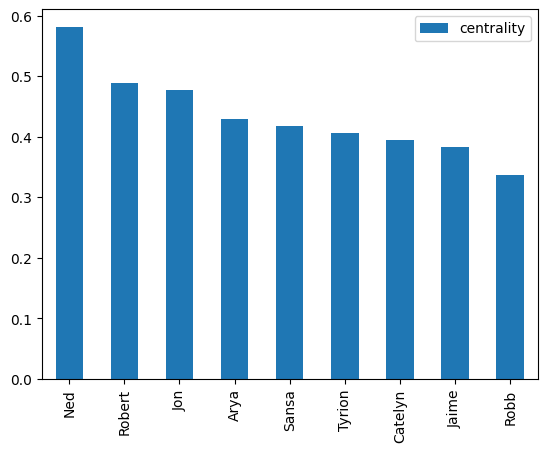

In [ ]:
degree_df = pd.DataFrame.from_dict(degree_dict, orient='index', columns=['centrality'])
# Plot top 10 nodes
degree_df.sort_values('centrality', ascending=False)[0:9].plot(kind="bar")

In [ ]:
pip install python-louvain

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import community.community_louvain as community_louvain

In [ ]:
communities = community_louvain.best_partition(G)

In [ ]:
communities

In [ ]:
nx.set_node_attributes(G,communities,"group")

In [ ]:
from pyvis.network import Network
from IPython.core.display import display, HTML
net = Network(notebook=True,bgcolor="#222222",font_color="white",cdn_resources='remote')
node_degree = dict(G.degree)
degree_values = np.array(list(node_degree.values()))

# Defina os valores mínimos e máximos para a escala
min_size = 10  # Tamanho mínimo do nó
max_size = 30  # Tamanho máximo do nó

# Normalize os valores do grau dos nós para o intervalo [0, 1]
normalized_sizes = (degree_values - np.min(degree_values)) / (np.max(degree_values) - np.min(degree_values))

# Calcule os tamanhos dos nós usando a escala
node_sizes = min_size + normalized_sizes * (max_size - min_size)

# Atribua os tamanhos normalizados aos nós
node_size_dict = dict(zip(G.nodes(), node_sizes))
nx.set_node_attributes(G,node_size_dict,"size")
net.from_nx(G)
net.toggle_physics(True)
net.force_atlas_2based(gravity=-50,overlap=0.5)
net.show("GOT.html")

display(HTML('GOT.html'))

GOT.html
